## Chapter 05: Symbolic mathematics with Sympy

This lab sheet introduces a specific mathematical library called Sympy which allows us to carry out symbolic mathematics.

In the previous week we saw a variety of different libraries:

In [1]:
import random
import math

and there are many more. These libraries are part of the ''standard library''.
This means that they come with the base version of Python. There are a variety
of other libraries that exist and are developed independently. Some of these
come as standard with Anaconda.

This lab sheet will introduce one such library:
[SymPy](http://www.sympy.org/en/index.html) which allows us to do symbolic
mathematics.

### 1. Exact calculations

[A video describing the concept.](https://youtu.be/pLxvfpwbf7E)

[A video demo.](https://youtu.be/ZmbX8P8dx-U)

Using Python we can calculate the square root and trigonometric values of numbers (we do this by importing the math library)::

In [2]:
import math
math.sqrt(20)

4.47213595499958

In [3]:
math.cos(math.pi / 4)

0.7071067811865476

These are fine for numerical work but not when it comes to carrying out **exact** mathematical calculations, where for example we know that:

\\[
    \cos(\pi / 4) = \sqrt{2} / 2
\\]

This is where Sympy is useful: it can carry out exact mathematical calculations:

In [4]:
import sympy as sym
sym.sqrt(20)

2*sqrt(5)

In [5]:
sym.cos(sym.pi / 4)

sqrt(2)/2

We also have access to complex numbers:

In [6]:
sym.I ** 2

-1

In [7]:
sym.sqrt(-20)

2*sqrt(5)*I

Sympy also has numerous functions to manipulate natural numbers:

In [8]:
N = 45 * 63
sym.isprime(N)

False

In [9]:
sym.primefactors(N)

[3, 5, 7]

In [10]:
all(sym.isprime(p) for p in sym.primefactors(N))  # All prime factors are prime

True

In [11]:
sym.factorint(N)

{3: 4, 5: 1, 7: 1}

In [12]:
N == 3 ** 4 * 5 * 7  # Checking the output of `factorint`

True

Repeat the above example with a different value of `N`.


### 2. Symbolic expressions

[A video describing the concept.](https://youtu.be/QaxNFo7vpEE)

[A Video demo.](https://youtu.be/ItcZk5MY9D8)

Using Sympy it is possible to carry out symbolic computations. To do this we need to creates instances of the Sympy Symbols class.

In [13]:
x = sym.Symbol("x")
x

x

In [14]:
type(x)

sympy.core.symbol.Symbol

We can then manipulate this abstract symbolic object without giving it a specific numerical value:

In [15]:
x + x

2*x

In [16]:
x - x

0

In [17]:
x ** 2

x**2

Sympy has a helpful `symbols` (with a small `s`) function that lets us create multiple `sympy.Symbol` objects at a time:

In [18]:
y, z = sym.symbols("y, z")
y, z

(y, z)

Symbolic expressions can be manipulated using Sympy's:


- `factor`
- `expand`

Here we confirm some well known formula:

In [19]:
expr = x ** 2 + 2 * x * y + y ** 2
expr

x**2 + 2*x*y + y**2

In [20]:
expr.factor()

(x + y)**2

In [21]:
expr = (x - y) * (x + y)
expr

(x - y)*(x + y)

In [22]:
sym.expand(expr)  # Note we could also use `expr.expand`

x**2 - y**2

Sympy also has a `simplify` command that can be powerful. Experiment with all of these as well as more complex expressions.

### 3. Symbolic equations

[A video describing the concept.](https://youtu.be/J0gU7GInOwI)

[A video demo.](https://youtu.be/8zTzpDW00Ek)

We can use Sympy to solve symbolic equations. Let us solve the following symbolic equation:

\\[
    x ^ 2 + 3 x - 2 = 0
\\]

We do this using the `solveset` function:

In [23]:
sym.solveset(x ** 2 + 3 * x - 2, x)

FiniteSet(-3/2 + sqrt(17)/2, -sqrt(17)/2 - 3/2)

If our equation had a non zero right hand side we can use one of two
approaches:

\\[
    x^2 + 3x - 2=y
\\]

`1`. Modify the equation so that it corresponds to an equation with zero right
  hand side:

In [24]:
sym.solveset(x ** 2 + 3 * x - 2 - y, x)

FiniteSet(-sqrt(4*y + 17)/2 - 3/2, sqrt(4*y + 17)/2 - 3/2)

`2`. Create an `Eq` object:


In [25]:
eqn = sym.Eq(x ** 2 + 3 * x - 2, y)
sym.solveset(eqn, x)

FiniteSet(-sqrt(4*y + 17)/2 - 3/2, sqrt(4*y + 17)/2 - 3/2)

We can also specify a domain. For example the following equation has two
solutions (it's a quadratic):

\\[
    x^2 = -9
\\]

In [26]:
sym.solveset(x ** 2 + 9, x)

FiniteSet(-3*I, 3*I)

However if we restrict ourselves to the Reals this is no longer the case:

In [27]:
sym.solveset(x ** 2 + 9, x, domain=sym.S.Reals)

EmptySet

### 4. Symbolic calculus

[A video describing the concept.](https://youtu.be/7_uzDdVsaGE)

[A video demo.](https://youtu.be/zjQGPaHlsH4)

It is possible to carry out various symbolic calculus related operations using Sympy:

Let us consider the function:

\\[
    f(x) = 1 / x
\\]

We will do this by defining a standard Python function:

In [28]:
def f(x):
    return 1 / x

and passing it our symbolic variable:

In [29]:
f(x)

1/x

We can compute the limits at \\(\pm\infty\\)

In [30]:
sym.limit(f(x), x, sym.oo)

0

In [31]:
sym.limit(f(x), x, -sym.oo)

0

In [32]:
sym.limit(f(x), x, +sym.oo)

0

We can also compute the limit at \\(0\\) however we must be careful here (you will recall from basic calculus that the limit depends on the direction):

In [33]:
sym.limit(f(x), x, 0)  # The default direction of approach is positive.

oo

In [34]:
sym.limit(f(x), x, 0, dir="+")

oo

In [35]:
sym.limit(f(x), x, 0, dir="-")

-oo

We can use Sympy to carry out differentiation:

In [36]:
sym.diff(f(x), x)

-1/x**2

In [37]:
sym.diff(sym.cos(x), x)

-sin(x)

We can carry out various orders of differentiation. These all give the second order derivative of \\(\cos(x)\\):

In [38]:
sym.diff(sym.diff(sym.cos(x), x), x)

-cos(x)

In [39]:
sym.diff(sym.cos(x), x, x)

-cos(x)

In [40]:
sym.diff(sym.cos(x), x, 2)

-cos(x)

As well as differentiation it is possible to carry out integration.

We can do both definite and indefinite integrals:

In [41]:
sym.integrate(f(x), x)  # An indefinite integral

log(x)

In [42]:
sym.integrate(f(x), (x, sym.exp(1), sym.exp(5)))  # A definite integral

4

### 5. Differential equations

[A video describing the concept.](https://youtu.be/GVOCHUFd4do)

[A video demo.](https://youtu.be/VIxjluFb6rM)

We can use SymPy to solve differential equations. For example:

\\[
    \frac{dy}{dx} = y
\\]

In [43]:
y = sym.Function('y')
x = sym.symbols('x')
sol = sym.dsolve(sym.Derivative(y(x), x) - y(x), y(x))
sol

Eq(y(x), C1*exp(x))

Let us verify that the solution is correct:

In [44]:
sym.diff(sol.rhs, x) == sol.rhs

True

We can also solve higher order differential equations. For example, the following can be used to model the position of a mass on a spring:

\\[
    m\frac{d^2x}{dt^2} + c\frac{dx}{dt} + kx = 0
\\]

In [45]:
m, c, k, t = sym.symbols('m, c, k, t')
x = sym.Function("x")
sym.dsolve(m * sym.Derivative(x(t), t, 2) + c * sym.Derivative(x(t), t) + k * x(t), x(t))

Eq(x(t), C1*exp(t*(-c - sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)))

We can solve systems of differential equations like the following:


\\[
    \begin{aligned}
        \frac{dx}{dt} & = 1-y\\
        \frac{dy}{dt} & = 1-x\\
    \end{aligned}
\\]

In [46]:
eq1 = sym.Derivative(x(t), t) - 1 + y(t)
eq2 = sym.Derivative(y(t), t) - 1 + x(t)
sym.dsolve((eq1, eq2))

[Eq(x(t), -C1*exp(t) - C2*exp(-t) + 1), Eq(y(t), C1*exp(t) - C2*exp(-t) + 1)]

The solution is given as:

\\[
    \begin{align}
        x(t) & =-C_1e^{-t}-C_2e^{t} + 1\\
        y(t) & =-C_1e^{-t}-C_2e^{t} + 1\\
    \end{align}
\\]

### 6. Displaying output using \\(\LaTeX\\)

[A video describing the concept.](https://youtu.be/8aE-97MWoRQ)

[A video demo.](https://youtu.be/iVj7dh-opPU)

We can make use of \\(\LaTeX\\) to display the output of Sympy in a human friendly way:

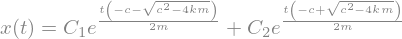

In [47]:
sym.init_printing()
m, c, k, t = sym.symbols('m, c, k, t')
x = sym.Function("x")
sym.dsolve(m * sym.Derivative(x(t), t, 2) + c * sym.Derivative(x(t), t) + k * x(t), x(t))

On some occasions it might be helpful to be able to turn this off (for example if we wanted to copy and paste the output):

In [48]:
sym.init_printing(False)
m, c, k, t = sym.symbols('m, c, k, t')
x = sym.Function("x")
sym.dsolve(m * sym.Derivative(x(t), t, 2) + c * sym.Derivative(x(t), t) + k * x(t), x(t))

Eq(x(t), C1*exp(t*(-c - sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)))

---


## Exercises

Here are a number of exercises that are possible to carry out using Sympy:

- Using exact arithmetic;
- Algebraic manipulation of symbolic variables;
- Limits, differentiation and integration;
- Solving differential equations.


### Exercise 1.

Use SymPy to write the first \\(10^3\\) prime numbers to file. Compare this
file to `primes.csv` ([download](/{{root}}/nbs/chapters/primes.csv)) (not by hand!) and check that it is the same.

We need to do a bit of work here to find out how we generate primes using sympy. This requires searching.

In [49]:
sym.prime(5)  # the 5th prime is 11

11

In [50]:
# let us generate all the first 10 ** 6 primes: this takes a while
primes = [sym.prime(k) for k in range(1, 10 ** 3 + 1)]

In [51]:
# let us read in the primes from file:
with open("primes.csv", 'r') as f:
    primes_from_file = f.read().split('\n')
primes_from_file[:5]  # Seeing the first 5

['2', '3', '5', '7', '11']

In [52]:
primes_from_file[-5:]  # Seeing the last 5

['15485843', '15485849', '15485857', '15485863', '']

In [53]:
primes_from_file[:10 ** 3] == [str(p) for p in primes]  # We only consider the first 10 ^ 3 values in the file

True

### Exercise 2. 

Use Sympy's `simplify` method (and other things) to verify the follow trigonometric identities:

1. \\(\sin^2(\theta) + \cos^2(\theta) = 1\\)
2. \\(2\cos(\theta) \sin(\theta) = \sin(2\theta)\\)
3. \\((1 - \cos(\theta)) / 2 = \sin^2(\theta / 2)\\)
4. \\(\cos(n\pi)=(-1) ^ n\\) (for \\(n\in\mathbb{Z}\\) (Hint: you will need to
   look in to options that can be passed to `symbols` for this)

In [54]:
theta = sym.symbols('theta')
(sym.sin(theta) ** 2 + sym.cos(theta) ** 2).simplify()  == 1

True

In [55]:
(2 * sym.cos(theta) * sym.sin(theta)).simplify() == sym.sin(2 * theta)

True

We need to work a bit harder to check equality here, taking the difference and seeing it's equal to 0.

In [56]:
((1 - sym.cos(theta)) / 2 - sym.sin(theta / 2) ** 2).simplify()

0

Let us find out what options can be passed to symbols:

In [57]:
sym.symbols?

In [58]:
n = sym.symbols('n', integer=True)
sym.cos(n * sym.pi).simplify()

(-1)**n

### Exercise 3.

The point of this question is to investigate the definition of a derivative:

\\[
    \frac{df}{dx}=\lim_{h\to 0}\frac{f(x+h)-f(x)}{h}
\\]

1. Consider \\(f(x) = x^3 + 3x - 20\\);
2. Compute \\(\frac{f(x+h)-f(x)}{h}\\);
3. Compute the above limit as \\(h\to 0\\) and verify that this is the derivative of \\(f\\).

In [59]:
def f(x):
    return x ** 3 + 3 * x - 20

In [60]:
h, x = sym.symbols('h, x')
rhs = (f(x + h) - f(x)) / h
rhs

(3*h - x**3 + (h + x)**3)/h

In [61]:
sym.limit(rhs, h, 0)

3*x**2 + 3

In [62]:
sym.diff(f(x), x)

3*x**2 + 3

### Exercise 4.

Find the general solutions to the following 4 differential equations:

1. \\(\frac{dy}{dx}-6y=3e^x\\)
2. \\(\frac{dy}{dx}+\frac{x(2x-3)}{x^2+1}=\sin(x)\\)
3. \\(\frac{d^2y}{dx^2}-y=\sin(5x)\\)
4. \\(\frac{d^2y}{dx^2}+2\frac{dy}{dx}+2x=\cosh(x)\\)

In [63]:
eq1 = sym.Derivative(y(x), x) - 6 * y(x) - 3 * sym.exp(x)
sol1 = sym.dsolve(eq1, y(x))
sol1

Eq(y(x), (C1 - 3*exp(-5*x)/5)*exp(6*x))

In [64]:
eq2 = sym.Derivative(y(x), x) + x * (2 * x - 3) / (x ** 2 + 1) - sym.sin(x)
sol2 = sym.dsolve(eq2, y(x))
sol2

Eq(y(x), C1 - 2*x + 3*log(x**2 + 1)/2 - cos(x) + 2*atan(x))

In [65]:
eq3 = sym.Derivative(y(x), x, 2) - y(x) - sym.sin(5 * x)
sol3 = sym.dsolve(eq3, y(x))
sol3

Eq(y(x), C1*exp(-x) + C2*exp(x) - sin(5*x)/26)

In [66]:
eq4 = sym.Derivative(y(x), x, 2) +  2 * sym.Derivative(y(x), x) + 2 * x - sym.cosh(x)
sol4 = sym.dsolve(eq4, y(x))
sol4

Eq(y(x), C1 + C2*exp(-2*x) - x**2/2 + x/2 + 2*sinh(x)/3 - cosh(x)/3)

### Exercise 5.

A battle between two armies can be modelled with the following set of differential equations:

\\[
   \begin{cases}
     \frac{dx}{dt} = - y\\
     \frac{dy}{dt} = -5x
   \end{cases}
\\]

Obtain the solution to this system of equations.

In [67]:
x, y = sym.Function('x'), sym.Function('y')
eq1 = sym.Derivative(x(t), t) + y(t)
eq2 = sym.Derivative(y(t), t) + 5 * x(t)
sols = sym.dsolve((eq1, eq2))
sols

[Eq(x(t), -C1*exp(sqrt(5)*t) - C2*exp(-sqrt(5)*t)), Eq(y(t), sqrt(5)*C1*exp(sqrt(5)*t) - sqrt(5)*C2*exp(-sqrt(5)*t))]

---

## Further resources

- [Sympy lecture scipy-lecture notes](https://www.scipy-lectures.org/packages/sympy.html)
- [Sympy documentation for differential equations](https://docs.sympy.org/dev/modules/solvers/ode.html)